In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats
%matplotlib inline


def sum_of_square(vec_a, vec_b):
    diff = vec_a - vec_b
    diff_squared = np.square(diff)
    return (np.sum(diff_squared))

df = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\gfs_bom_data\\gfs_bom_loc_1.csv")


In [2]:
# Setting UtcTime as the index
df.set_index("Unnamed: 0", inplace=True)

In [3]:
# Dropping variables that are not used for training
df = df.drop('index',axis=1)
df = df.drop('ObservationId',axis=1)
df = df.drop('Timestamp',axis=1)
df = df.drop('ParentLocationId',axis=1)
df = df.drop('RelatedLocationId',axis=1)
df = df.drop('ReadingId',axis=1)
df = df.drop('LocalTime',axis=1)
df = df.drop('TimeZone',axis=1)
df = df.drop('WindDirection',axis=1)
df = df.drop('WindDirectionCompass',axis=1)

# Dropping more variables

# df = df.drop('Temperature',axis=1)
df = df.drop('FeelsLike',axis=1)
df = df.drop('DewPoint',axis=1)
df = df.drop('RelativeHumidity',axis=1)
df = df.drop('Pressure',axis=1)


df = df.drop('WindSpeed',axis=1)
df = df.drop('WindGust',axis=1)
df = df.drop('RainSince9am',axis=1)
df = df.drop('RainfallLastHour',axis=1)
df = df.drop('RainfallLast10Minutes',axis=1)
df = df.drop('pred_cloud_cover',axis=1)
df = df.drop('pred_dewp',axis=1)
df = df.drop('pred_lw_rad',axis=1)
df = df.drop('pred_merid_wind',axis=1)
df = df.drop('pred_pe',axis=1)
df = df.drop('pred_rain_rate',axis=1)
df = df.drop('pred_soil_moisture_lower',axis=1)
df = df.drop('pred_soil_moisture_upper',axis=1)
df = df.drop('pred_sunshine',axis=1)
df = df.drop('pred_surface_pressure',axis=1)
df = df.drop('pred_sw_rad',axis=1)
# df = df.drop('pred_temp',axis=1)
df = df.drop('pred_zonal_wind',axis=1)





# Change units 
df.pred_temp = df.pred_temp - 273.15 # Kelvin to Celsius
# df.pred_dewp = df.pred_dewp - 273.15 # Kelvin to Celsius


In [4]:
# If you want to remove some features, 
# Initially, just select the following variables
# df

In [5]:
print df.columns
print 'Total number of columns = %d' %(len(df.columns))

Index([u'Temperature', u'pred_temp'], dtype='object')
Total number of columns = 2


In [6]:
# Generate df for gt label (Y)
df_gt_output = pd.DataFrame(df.Temperature)

# Rename dataframe for data matrix (X)
df_data = df

In [7]:
# Add temp for the next 7-days
for hrs in range(1,169):
    col_name = 'y_t_'+str(hrs)
    df_gt_output[col_name] = df_gt_output.Temperature.shift(-hrs)
    # print col_name

# Now remove the current temperature from this dataframe
df_gt_output = df_gt_output.drop('Temperature', axis=1)

In [8]:
# df_data.columns
df.columns

Index([u'Temperature', u'pred_temp'], dtype='object')

In [9]:
# Get the observation from past two hours
past_hours = 3

# BOM Temperature for the last two hours
current_col = 'Temperature'
for hr in range(1,past_hours):
    col_name = current_col+'_past'+str(hr)+'hr'
    df_data[col_name] = df[current_col].shift(hr) # Include past values
    print col_name
    
# Add GFS forecasts into the input for the next hour
current_col = 'pred_temp'
next_hours = 169
for hr in range(1,next_hours):
    col_name = 'y_gfs_fcst_'+str(hr)
    df_data[col_name] = df[current_col].shift(-hr) # Include Future Values from GFS
    print col_name

Temperature_past1hr
Temperature_past2hr
y_gfs_fcst_1
y_gfs_fcst_2
y_gfs_fcst_3
y_gfs_fcst_4
y_gfs_fcst_5
y_gfs_fcst_6
y_gfs_fcst_7
y_gfs_fcst_8
y_gfs_fcst_9
y_gfs_fcst_10
y_gfs_fcst_11
y_gfs_fcst_12
y_gfs_fcst_13
y_gfs_fcst_14
y_gfs_fcst_15
y_gfs_fcst_16
y_gfs_fcst_17
y_gfs_fcst_18
y_gfs_fcst_19
y_gfs_fcst_20
y_gfs_fcst_21
y_gfs_fcst_22
y_gfs_fcst_23
y_gfs_fcst_24
y_gfs_fcst_25
y_gfs_fcst_26
y_gfs_fcst_27
y_gfs_fcst_28
y_gfs_fcst_29
y_gfs_fcst_30
y_gfs_fcst_31
y_gfs_fcst_32
y_gfs_fcst_33
y_gfs_fcst_34
y_gfs_fcst_35
y_gfs_fcst_36
y_gfs_fcst_37
y_gfs_fcst_38
y_gfs_fcst_39
y_gfs_fcst_40
y_gfs_fcst_41
y_gfs_fcst_42
y_gfs_fcst_43
y_gfs_fcst_44
y_gfs_fcst_45
y_gfs_fcst_46
y_gfs_fcst_47
y_gfs_fcst_48
y_gfs_fcst_49
y_gfs_fcst_50
y_gfs_fcst_51
y_gfs_fcst_52
y_gfs_fcst_53
y_gfs_fcst_54
y_gfs_fcst_55
y_gfs_fcst_56
y_gfs_fcst_57
y_gfs_fcst_58
y_gfs_fcst_59
y_gfs_fcst_60
y_gfs_fcst_61
y_gfs_fcst_62
y_gfs_fcst_63
y_gfs_fcst_64
y_gfs_fcst_65
y_gfs_fcst_66
y_gfs_fcst_67
y_gfs_fcst_68
y_gfs_fcst_69
y_g

In [10]:
df_gt_output.head(2)

,y_t_1,y_t_2,y_t_3,y_t_4,y_t_5,y_t_6,y_t_7,y_t_8,y_t_9,y_t_10,...,y_t_159,y_t_160,y_t_161,y_t_162,y_t_163,y_t_164,y_t_165,y_t_166,y_t_167,y_t_168
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2016-06-28 14:00:00,12.1,11.5,11.7,10.9,9.8,9.7,9.3,10.4,10.6,11.6,...,11.2,10.2,10.3,10.1,9.8,9.5,9.6,9.3,9.4,9.7
2016-06-28 15:00:00,11.5,11.7,10.9,9.8,9.7,9.3,10.4,10.6,11.6,12.6,...,10.2,10.3,10.1,9.8,9.5,9.6,9.3,9.4,9.7,9.6


In [11]:
df_data.head(5)

,Temperature,pred_temp,Temperature_past1hr,Temperature_past2hr,y_gfs_fcst_1,y_gfs_fcst_2,y_gfs_fcst_3,y_gfs_fcst_4,y_gfs_fcst_5,y_gfs_fcst_6,...,y_gfs_fcst_159,y_gfs_fcst_160,y_gfs_fcst_161,y_gfs_fcst_162,y_gfs_fcst_163,y_gfs_fcst_164,y_gfs_fcst_165,y_gfs_fcst_166,y_gfs_fcst_167,y_gfs_fcst_168
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2016-06-28 14:00:00,12.0,10.216669,NaN,NaN,10.350000,10.283329,10.216659,10.149988,10.016656,9.883325,...,9.883325,9.649988,9.516656,9.383325,9.249994,9.049992,8.849990,8.649988,8.483321,8.316654
2016-06-28 15:00:00,12.1,10.350000,12.0,NaN,10.283329,10.216659,10.149988,10.016656,9.883325,9.749994,...,9.649988,9.516656,9.383325,9.249994,9.049992,8.849990,8.649988,8.483321,8.316654,8.149988
2016-06-28 16:00:00,11.5,10.283329,12.1,12.0,10.216659,10.149988,10.016656,9.883325,9.749994,10.083327,...,9.516656,9.383325,9.249994,9.049992,8.849990,8.649988,8.483321,8.316654,8.149988,8.016656
2016-06-28 17:00:00,11.7,10.216659,11.5,12.1,10.149988,10.016656,9.883325,9.749994,10.083327,10.416661,...,9.383325,9.249994,9.049992,8.849990,8.649988,8.483321,8.316654,8.149988,8.016656,7.883325
2016-06-28 18:00:00,10.9,10.149988,11.7,11.5,10.016656,9.883325,9.749994,10.083327,10.416661,10.749994,...,9.249994,9.049992,8.849990,8.649988,8.483321,8.316654,8.149988,8.016656,7.883325,7.749994


In [12]:
new_df = pd.DataFrame()
new_df['Temperature'] = df_data.Temperature
new_df['Temperature_past1hr'] = df_data.Temperature_past1hr
new_df['Temperature_past2hr'] = df_data.Temperature_past2hr
new_df['pred_temp'] = df_data.pred_temp
new_df['y_gfs_fcst_1'] = df_data.y_gfs_fcst_1
new_df


,Temperature,Temperature_past1hr,Temperature_past2hr,pred_temp,y_gfs_fcst_1
Unnamed: 0,,,,,
2016-06-28 14:00:00,12.000000,NaN,NaN,10.216669,10.350000
2016-06-28 15:00:00,12.100000,12.000000,NaN,10.350000,10.283329
2016-06-28 16:00:00,11.500000,12.100000,12.000000,10.283329,10.216659
2016-06-28 17:00:00,11.700000,11.500000,12.100000,10.216659,10.149988
2016-06-28 18:00:00,10.900000,11.700000,11.500000,10.149988,10.016656
2016-06-28 19:00:00,9.800000,10.900000,11.700000,10.016656,9.883325
2016-06-28 20:00:00,9.700000,9.800000,10.900000,9.883325,9.749994
2016-06-28 21:00:00,9.300000,9.700000,9.800000,9.749994,10.083327
2016-06-28 22:00:00,10.400000,9.300000,9.700000,10.083327,10.416661


In [13]:
# df_data.to_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\gfs_bom_data\\setting_1\\check_dfdata.csv")
# df_gt_output.to_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\gfs_bom_data\\setting_1\\check_df_gt_output.csv")


In [14]:
# df_data

In [15]:
# df_gt_output

In [16]:
len(df_data.columns)

172

In [17]:
tot_cols_df_data = len(df_data.columns)
# Combine data and temp forecast for the next seven days and filter nan
df_combined = pd.concat([df_data,df_gt_output], axis=1)
df_combined = df_combined.dropna()

# Get the list of column names
data_columns = df_combined.columns[0:tot_cols_df_data]
gt_temp_columns = df_combined.columns[tot_cols_df_data:]

# create new dataframe for data and forecast
df_data_nan_filtered = df_combined[data_columns]
df_gt_output_nan_filtered = df_combined[gt_temp_columns]


In [18]:
df_combined.columns[0:tot_cols_df_data]

Index([u'Temperature', u'pred_temp', u'Temperature_past1hr',
       u'Temperature_past2hr', u'y_gfs_fcst_1', u'y_gfs_fcst_2',
       u'y_gfs_fcst_3', u'y_gfs_fcst_4', u'y_gfs_fcst_5', u'y_gfs_fcst_6',
       ...
       u'y_gfs_fcst_159', u'y_gfs_fcst_160', u'y_gfs_fcst_161',
       u'y_gfs_fcst_162', u'y_gfs_fcst_163', u'y_gfs_fcst_164',
       u'y_gfs_fcst_165', u'y_gfs_fcst_166', u'y_gfs_fcst_167',
       u'y_gfs_fcst_168'],
      dtype='object', length=172)

In [19]:
df_data_nan_filtered

,Temperature,pred_temp,Temperature_past1hr,Temperature_past2hr,y_gfs_fcst_1,y_gfs_fcst_2,y_gfs_fcst_3,y_gfs_fcst_4,y_gfs_fcst_5,y_gfs_fcst_6,...,y_gfs_fcst_159,y_gfs_fcst_160,y_gfs_fcst_161,y_gfs_fcst_162,y_gfs_fcst_163,y_gfs_fcst_164,y_gfs_fcst_165,y_gfs_fcst_166,y_gfs_fcst_167,y_gfs_fcst_168
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2016-06-28 16:00:00,11.500000,10.283329,12.100000,12.000000,10.216659,10.149988,10.016656,9.883325,9.749994,10.083327,...,9.516656,9.383325,9.249994,9.049992,8.849990,8.649988,8.483321,8.316654,8.149988,8.016656
2016-06-28 17:00:00,11.700000,10.216659,11.500000,12.100000,10.149988,10.016656,9.883325,9.749994,10.083327,10.416661,...,9.383325,9.249994,9.049992,8.849990,8.649988,8.483321,8.316654,8.149988,8.016656,7.883325
2016-06-28 18:00:00,10.900000,10.149988,11.700000,11.500000,10.016656,9.883325,9.749994,10.083327,10.416661,10.749994,...,9.249994,9.049992,8.849990,8.649988,8.483321,8.316654,8.149988,8.016656,7.883325,7.749994
2016-06-28 19:00:00,9.800000,10.016656,10.900000,11.700000,9.883325,9.749994,10.083327,10.416661,10.749994,11.683333,...,9.049992,8.849990,8.649988,8.483321,8.316654,8.149988,8.016656,7.883325,7.749994,7.716659
2016-06-28 20:00:00,9.700000,9.883325,9.800000,10.900000,9.749994,10.083327,10.416661,10.749994,11.683333,12.616673,...,8.849990,8.649988,8.483321,8.316654,8.149988,8.016656,7.883325,7.749994,7.716659,7.683323
2016-06-28 21:00:00,9.300000,9.749994,9.700000,9.800000,10.083327,10.416661,10.749994,11.683333,12.616673,13.550012,...,8.649988,8.483321,8.316654,8.149988,8.016656,7.883325,7.749994,7.716659,7.683323,7.649988
2016-06-28 22:00:00,10.400000,10.083327,9.300000,9.700000,10.416661,10.749994,11.683333,12.616673,13.550012,12.750004,...,8.483321,8.316654,8.149988,8.016656,7.883325,7.749994,7.716659,7.683323,7.649988,7.883325
2016-06-28 23:00:00,10.600000,10.416661,10.400000,9.300000,10.749994,11.683333,12.616673,13.550012,12.750004,11.949996,...,8.316654,8.149988,8.016656,7.883325,7.749994,7.716659,7.683323,7.649988,7.883325,8.116663
2016-06-29 00:00:00,11.600000,10.749994,10.600000,10.400000,11.683333,12.616673,13.550012,12.750004,11.949996,11.149988,...,8.149988,8.016656,7.883325,7.749994,7.716659,7.683323,7.649988,7.883325,8.116663,8.350000


In [20]:
df_gt_output_nan_filtered

,y_t_1,y_t_2,y_t_3,y_t_4,y_t_5,y_t_6,y_t_7,y_t_8,y_t_9,y_t_10,...,y_t_159,y_t_160,y_t_161,y_t_162,y_t_163,y_t_164,y_t_165,y_t_166,y_t_167,y_t_168
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2016-06-28 16:00:00,11.700000,10.900000,9.800000,9.700000,9.300000,10.400000,10.600000,11.600000,12.600000,12.500000,...,10.300000,10.100000,9.800000,9.500000,9.600000,9.300000,9.400000,9.700000,9.600000,8.400000
2016-06-28 17:00:00,10.900000,9.800000,9.700000,9.300000,10.400000,10.600000,11.600000,12.600000,12.500000,13.100000,...,10.100000,9.800000,9.500000,9.600000,9.300000,9.400000,9.700000,9.600000,8.400000,9.200000
2016-06-28 18:00:00,9.800000,9.700000,9.300000,10.400000,10.600000,11.600000,12.600000,12.500000,13.100000,14.600000,...,9.800000,9.500000,9.600000,9.300000,9.400000,9.700000,9.600000,8.400000,9.200000,9.600000
2016-06-28 19:00:00,9.700000,9.300000,10.400000,10.600000,11.600000,12.600000,12.500000,13.100000,14.600000,14.100000,...,9.500000,9.600000,9.300000,9.400000,9.700000,9.600000,8.400000,9.200000,9.600000,9.700000
2016-06-28 20:00:00,9.300000,10.400000,10.600000,11.600000,12.600000,12.500000,13.100000,14.600000,14.100000,13.800000,...,9.600000,9.300000,9.400000,9.700000,9.600000,8.400000,9.200000,9.600000,9.700000,9.700000
2016-06-28 21:00:00,10.400000,10.600000,11.600000,12.600000,12.500000,13.100000,14.600000,14.100000,13.800000,10.900000,...,9.300000,9.400000,9.700000,9.600000,8.400000,9.200000,9.600000,9.700000,9.700000,9.500000
2016-06-28 22:00:00,10.600000,11.600000,12.600000,12.500000,13.100000,14.600000,14.100000,13.800000,10.900000,10.100000,...,9.400000,9.700000,9.600000,8.400000,9.200000,9.600000,9.700000,9.700000,9.500000,9.600000
2016-06-28 23:00:00,11.600000,12.600000,12.500000,13.100000,14.600000,14.100000,13.800000,10.900000,10.100000,10.700000,...,9.700000,9.600000,8.400000,9.200000,9.600000,9.700000,9.700000,9.500000,9.600000,9.500000
2016-06-29 00:00:00,12.600000,12.500000,13.100000,14.600000,14.100000,13.800000,10.900000,10.100000,10.700000,9.700000,...,9.600000,8.400000,9.200000,9.600000,9.700000,9.700000,9.500000,9.600000,9.500000,9.700000


In [21]:
# df_data_nan_filtered.to_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\gfs_bom_data\\setting_1\\check_dfdata.csv")
# df_gt_output_nan_filtered.to_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\gfs_bom_data\\setting_1\\check_df_gt_output.csv")

In [22]:
df_data_nn = pd.DataFrame()
df_data_nn['Temperature'] = df_data_nan_filtered.Temperature
df_data_nn['Temperature_past1hr'] = df_data_nan_filtered.Temperature_past1hr
df_data_nn['Temperature_past2hr'] = df_data_nan_filtered.Temperature_past2hr
df_data_nn['pred_temp'] = df_data_nan_filtered.pred_temp
df_data_nn['y_gfs_fcst_1'] = df_data_nan_filtered.y_gfs_fcst_1
df_data_nn.head(5)

,Temperature,Temperature_past1hr,Temperature_past2hr,pred_temp,y_gfs_fcst_1
Unnamed: 0,,,,,
2016-06-28 16:00:00,11.5,12.1,12.0,10.283329,10.216659
2016-06-28 17:00:00,11.7,11.5,12.1,10.216659,10.149988
2016-06-28 18:00:00,10.9,11.7,11.5,10.149988,10.016656
2016-06-28 19:00:00,9.8,10.9,11.7,10.016656,9.883325
2016-06-28 20:00:00,9.7,9.8,10.9,9.883325,9.749994


In [23]:
df_data_matrix = df_data_nn.as_matrix()
df_gt_temp_forecast_matrix = df_gt_output_nan_filtered.as_matrix()

In [24]:
print df_data_matrix.shape
print df_gt_temp_forecast_matrix.shape

(4001L, 5L)
(4001L, 168L)


In [25]:
# df_data_nan_filtered.head(3)

In [26]:
# df_gt_output_nan_filtered.head(3)

In [27]:
tot_points = df_data_matrix.shape[0]
train_points = 3000 # training until September
test_points = tot_points - train_points
print(tot_points, train_points, test_points)

(4001L, 3000, 1001L)


In [28]:
# Generate Train Sequence
x_train = df_data_matrix[0:train_points + 1,:]
y_train = df_gt_temp_forecast_matrix[0:train_points + 1,:]
# Generate Test Sequence
x_test = df_data_matrix[train_points + 1:tot_points + 1 ,:]
y_test = df_gt_temp_forecast_matrix[train_points + 1:tot_points + 1 ,:]

print x_train.shape, y_train.shape
print x_test.shape, y_test.shape

(3001L, 5L) (3001L, 168L)
(1000L, 5L) (1000L, 168L)


In [29]:
print y_train.shape

(3001L, 168L)


In [30]:
# y_train[:,0].shape # pass this into the neural network
y_train_nn = np.array(y_train[0:,0:1]).copy()
y_test_nn = np.array(y_test[0:,0:1]).copy()
print y_train_nn.shape, y_test_nn.shape

(3001L, 1L) (1000L, 1L)


In [31]:
print y_test_nn[0:5]

[[ 12.39999962]
 [ 10.30000019]
 [  9.19999981]
 [  8.69999981]
 [  8.5       ]]


In [32]:
# Do scaling according to min-max scaling
scaler_minmax = preprocessing.MinMaxScaler()
x_train = scaler_minmax.fit_transform(x_train)

x_test_minmax = scaler_minmax.transform(x_test)

# Add polynomials
# poly = PolynomialFeatures(degree=2, interaction_only=True)
# x_train = poly.fit_transform(x_train)


In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

Using Theano backend.


In [34]:
print x_train.shape
print y_train.shape
print y_train_nn.shape
print y_test_nn.shape

(3001L, 5L)
(3001L, 168L)
(3001L, 1L)
(1000L, 1L)


In [32]:
# create model
model = Sequential()
model.add(Dense(3000, input_dim=x_train.shape[1], init='normal', activation='relu')) #1st Hidden Layer
model.add(Dense(2000, init='normal', activation='relu')) #2nd Hidden Layer
# model.add(Dense(5000, init='normal', activation='relu')) #next Hidden Layer
# model.add(Dense(2500, init='normal', activation='relu')) #next Hidden Layer
model.add(Dense(1000, init='normal', activation='relu')) #next Hidden Layer
model.add(Dense(500, init='normal', activation='relu')) #next Hidden Layer
model.add(Dense(y_train_nn.shape[1], init='normal')) #output layer
    
# compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [33]:
# model.fit(x_train, y_train, nb_epoch=20, verbose=1, batch_size = 250, shuffle=True)
model.fit(x_train, y_train_nn, nb_epoch=500, verbose=1, validation_data=(x_test_minmax, y_test_nn), batch_size = 32, shuffle=True)

Train on 3001 samples, validate on 1000 samples
Epoch 1/500
3001/3001 [==============================] - 9s - loss: 5.3026 - val_loss: 0.7059
Epoch 2/500
3001/3001 [==============================] - 9s - loss: 0.6087 - val_loss: 0.4965
Epoch 3/500
3001/3001 [==============================] - 9s - loss: 0.5830 - val_loss: 0.7401
Epoch 4/500
3001/3001 [==============================] - 11s - loss: 0.5803 - val_loss: 0.4695
Epoch 5/500
3001/3001 [==============================] - 13s - loss: 0.6146 - val_loss: 0.5530
Epoch 6/500
3001/3001 [==============================] - 14s - loss: 0.5745 - val_loss: 0.4507
Epoch 7/500
3001/3001 [==============================] - 17s - loss: 0.5730 - val_loss: 0.5406
Epoch 8/500
3001/3001 [==============================] - 34s - loss: 0.5836 - val_loss: 0.4432
Epoch 9/500
3001/3001 [==============================] - 44s - loss: 0.6903 - val_loss: 2.0692
Epoch 10/500
3001/3001 [==============================] - 35s - loss: 0.5999 - val_loss: 0.5082
Epoc

In [35]:
# model.save('C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\learning\\time_series\\feed_forward_nn\\models\\model_s7.h5')
from keras.models import load_model
model = load_model('C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\learning\\time_series\\feed_forward_nn\\models\\model_s7.h5')

In [36]:
print 'train_points: ',train_points,'test_points: ',test_points,'tot_points: ',tot_points

# Generate Train DF
df_train_for_eval = df_data_nan_filtered.iloc[0:train_points + 1,:]

# Generate Test DF
df_test_for_eval = df_data_nan_filtered.iloc[train_points + 1:tot_points + 1 ,:]


train_points:  3000 test_points:  1001 tot_points:  4001


In [37]:
df_test_for_eval.head(3)

,Temperature,pred_temp,Temperature_past1hr,Temperature_past2hr,y_gfs_fcst_1,y_gfs_fcst_2,y_gfs_fcst_3,y_gfs_fcst_4,y_gfs_fcst_5,y_gfs_fcst_6,...,y_gfs_fcst_159,y_gfs_fcst_160,y_gfs_fcst_161,y_gfs_fcst_162,y_gfs_fcst_163,y_gfs_fcst_164,y_gfs_fcst_165,y_gfs_fcst_166,y_gfs_fcst_167,y_gfs_fcst_168
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2016-10-21 06:00:00,13.7,13.439996,13.7,14.5,11.669997,9.899998,8.129999,7.869999,7.610000,7.350000,...,11.159998,10.023330,9.833885,8.886662,8.697217,7.749994,7.761106,7.816665,7.883335,7.950006
2016-10-21 07:00:00,12.4,11.669997,13.7,13.7,9.899998,8.129999,7.869999,7.610000,7.350000,7.311112,...,10.023330,9.833885,8.886662,8.697217,7.749994,7.761106,7.816665,7.883335,7.950006,7.855561
2016-10-21 08:00:00,10.3,9.899998,12.4,13.7,8.129999,7.869999,7.610000,7.350000,7.311112,7.116673,...,9.833885,8.886662,8.697217,7.749994,7.761106,7.816665,7.883335,7.950006,7.855561,7.383335


In [38]:
test_ex = 0
pred_list = []

x_test_ex = x_test_minmax[test_ex,:]
pred_val = model.predict(x_test_minmax)[test_ex]
pred_list.append(pred_val)

print 'x_test_instance: ',x_test_ex
print 'gt: ', y_test_nn[test_ex],'pred: ', pred_val

# print df_test_for_eval.ix[test_ex,"y_gfs_fcst_2"]
next_hours = 168
for hr in range(1,next_hours):
    col_name = 'y_gfs_fcst_'+str(hr)
    # print df_test_for_eval.ix[test_ex,col_name]

x_test_dim1 = df_test_for_eval.ix[test_ex,"Temperature"]
x_test_dim2 = df_test_for_eval.ix[test_ex,"Temperature_past1hr"]
x_test_dim3 = df_test_for_eval.ix[test_ex,"Temperature_past2hr"]
x_test_dim4 = df_test_for_eval.ix[test_ex,"pred_temp"]
x_test_dim5 = df_test_for_eval.ix[test_ex,"y_gfs_fcst_1"]

x_test_ex_arr = np.arange(5.0).reshape(1,5)
x_test_ex_arr[0,0] = x_test_dim1
x_test_ex_arr[0,1] = x_test_dim2
x_test_ex_arr[0,2] = x_test_dim3
x_test_ex_arr[0,3] = x_test_dim4
x_test_ex_arr[0,4] = x_test_dim5

print 'x_test_instance_before_transformation',x_test_ex_arr
x_test_ex_arr_transformed = scaler_minmax.transform(x_test_ex_arr)
print 'x_test_instance_after_transformation',x_test_ex_arr_transformed
print 'prediction on transformed x_test ',model.predict(x_test_ex_arr_transformed)
# x_test_ex: Temperature Temperature_past1hr Temperature_past2hr pred_temp y_gfs_fcst_1

x_test_instance:  [ 0.54741377  0.54741377  0.58189653  0.57634774  0.50290381]
gt:  [ 12.39999962] pred:  [ 12.8966074]
x_test_instance_before_transformation [[ 13.69999981  13.69999981  14.5         13.43999634  11.66999715]]
x_test_instance_after_transformation [[ 0.54741377  0.54741377  0.58189653  0.57634774  0.50290381]]
prediction on transformed x_test  [[ 12.89660835]]


x_test_instance:  [ 0.54741377  0.54741377  0.58189653  0.57634774  0.50290381]
gt:  [ 12.39999962] pred:  [ 12.8966074]


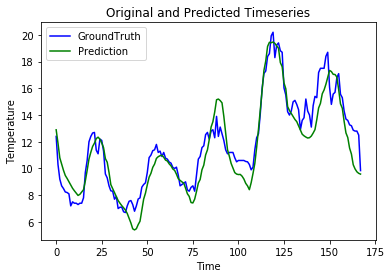

In [41]:
# At t
# x_test_ex: Temperature_at_t Temperature_t-1 Temperature_t-2 pred_temp_t y_gfs_fcst_1

# At t=t+1
# x_test_ex: Temperature_t+1 Temperature_t Temperature_t-1 y_gfs_fcst_t y_gfs_fcst_t+1

test_ex = 0
pred_list = []
x_test_ex_arr = np.arange(5.0).reshape(1,5)


x_test_ex = x_test_minmax[test_ex,:]
pred_val = model.predict(x_test_minmax)[test_ex]
pred_list.append(pred_val)

print 'x_test_instance: ',x_test_ex
print 'gt: ', y_test_nn[test_ex],'pred: ', pred_val

x_test_dim1_lasttime = df_test_for_eval.ix[test_ex,"Temperature"]
x_test_dim2_lasttime = df_test_for_eval.ix[test_ex,"Temperature_past1hr"]
x_test_dim3_lasttime = df_test_for_eval.ix[test_ex,"Temperature_past2hr"]
x_test_dim4_lasttime = df_test_for_eval.ix[test_ex,"pred_temp"]
x_test_dim5_lasttime = df_test_for_eval.ix[test_ex,"y_gfs_fcst_1"]

next_hours = 168 # Next seven days (168 hours)
for hr in range(1,next_hours):
    hr_t_1 = hr + 1
    col_name_gfs_1 = 'y_gfs_fcst_'+str(hr)
    col_name_gfs_2 = 'y_gfs_fcst_'+str(hr_t_1)
    
    # prepare test instance the next-hour forecast
    x_test_dim1_current = pred_val
    x_test_dim2_current = x_test_dim1_lasttime
    x_test_dim3_current = x_test_dim2_lasttime
    x_test_dim4_current = df_test_for_eval.ix[test_ex,col_name_gfs_1] 
    x_test_dim5_current = df_test_for_eval.ix[test_ex,col_name_gfs_2] 
    
    # Populate numpy array
    x_test_ex_arr[0,0] = x_test_dim1_current
    x_test_ex_arr[0,1] = x_test_dim2_current
    x_test_ex_arr[0,2] = x_test_dim3_current
    x_test_ex_arr[0,3] = x_test_dim4_current
    x_test_ex_arr[0,4] = x_test_dim5_current
    
    # Transform it
    x_test_ex_arr_transformed = scaler_minmax.transform(x_test_ex_arr)
    
    # Predict and add it to the list
    pred_val = model.predict(x_test_ex_arr_transformed)
    pred_list.append(pred_val)

    # Store current vector
    x_test_dim1_lasttime = x_test_dim1_current
    x_test_dim2_lasttime = x_test_dim2_current
    x_test_dim3_lasttime = x_test_dim3_current
    x_test_dim4_lasttime = x_test_dim4_current
    x_test_dim5_lasttime = x_test_dim5_current
    
y_pred_vec = np.asarray(pred_list)
y_gt_vec = y_test[test_ex,:] 

# print y_pred_vec.shape, y_gt_vec.shape

# plot
time_index = np.arange(0,168,1)
plt.plot(time_index,y_gt_vec,label="GroundTruth",color='b')
plt.plot(time_index,y_pred_vec,label="Prediction",color='g')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.title('Original and Predicted Timeseries')
img_filename = 'C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\learning\\time_series\\feed_forward_nn\\models\\s7_images\\'+str(test_ex)+'.png'
plt.savefig(img_filename, bbox_inches='tight')

In [39]:
def generate_pred_gt_vec(test_ex,x_test_minmax,model,y_test_nn,df_test_for_eval,scaler_minmax):
    # At t
    # x_test_ex: Temperature_at_t Temperature_t-1 Temperature_t-2 pred_temp_t y_gfs_fcst_1

    # At t=t+1
    # x_test_ex: Temperature_t+1 Temperature_t Temperature_t-1 y_gfs_fcst_t y_gfs_fcst_t+1

    pred_list = []
    x_test_ex_arr = np.arange(5.0).reshape(1,5)


    pred_val = model.predict(x_test_minmax)[test_ex]
    pred_list.append(pred_val)

    x_test_dim1_lasttime = df_test_for_eval.ix[test_ex,"Temperature"]
    x_test_dim2_lasttime = df_test_for_eval.ix[test_ex,"Temperature_past1hr"]
    x_test_dim3_lasttime = df_test_for_eval.ix[test_ex,"Temperature_past2hr"]
    x_test_dim4_lasttime = df_test_for_eval.ix[test_ex,"pred_temp"]
    x_test_dim5_lasttime = df_test_for_eval.ix[test_ex,"y_gfs_fcst_1"]

    next_hours = 168 # Next seven days (168 hours)
    for hr in range(1,next_hours):
        hr_t_1 = hr + 1
        col_name_gfs_1 = 'y_gfs_fcst_'+str(hr)
        col_name_gfs_2 = 'y_gfs_fcst_'+str(hr_t_1)

        # prepare test instance the next-hour forecast
        x_test_dim1_current = pred_val
        x_test_dim2_current = x_test_dim1_lasttime
        x_test_dim3_current = x_test_dim2_lasttime
        x_test_dim4_current = df_test_for_eval.ix[test_ex,col_name_gfs_1] 
        x_test_dim5_current = df_test_for_eval.ix[test_ex,col_name_gfs_2] 

        # Populate numpy array
        x_test_ex_arr[0,0] = x_test_dim1_current
        x_test_ex_arr[0,1] = x_test_dim2_current
        x_test_ex_arr[0,2] = x_test_dim3_current
        x_test_ex_arr[0,3] = x_test_dim4_current
        x_test_ex_arr[0,4] = x_test_dim5_current

        # Transform it
        x_test_ex_arr_transformed = scaler_minmax.transform(x_test_ex_arr)

        # Predict and add it to the list
        pred_val = model.predict(x_test_ex_arr_transformed)
        pred_list.append(pred_val)

        # Store current vector
        x_test_dim1_lasttime = x_test_dim1_current
        x_test_dim2_lasttime = x_test_dim2_current
        x_test_dim3_lasttime = x_test_dim3_current
        x_test_dim4_lasttime = x_test_dim4_current
        x_test_dim5_lasttime = x_test_dim5_current

    y_pred_vec = np.asarray(pred_list)
    y_gt_vec = y_test[test_ex,:]
    return y_gt_vec,y_pred_vec

In [44]:
# At t
# x_test_ex: Temperature_at_t Temperature_t-1 Temperature_t-2 pred_temp_t y_gfs_fcst_1

# At t=t+1
# x_test_ex: Temperature_t+1 Temperature_t Temperature_t-1 y_gfs_fcst_t y_gfs_fcst_t+1

# For plot
time_index = np.arange(0,168,1)

for test_ex in range(0,test_points):
    pred_list = []
    x_test_ex_arr = np.arange(5.0).reshape(1,5)


    x_test_ex = x_test_minmax[test_ex,:]
    pred_val = model.predict(x_test_minmax)[test_ex]
    pred_list.append(pred_val)

    # print 'x_test_instance: ',x_test_ex
    # print 'gt: ', y_test_nn[test_ex],'pred: ', pred_val

    x_test_dim1_lasttime = df_test_for_eval.ix[test_ex,"Temperature"]
    x_test_dim2_lasttime = df_test_for_eval.ix[test_ex,"Temperature_past1hr"]
    x_test_dim3_lasttime = df_test_for_eval.ix[test_ex,"Temperature_past2hr"]
    x_test_dim4_lasttime = df_test_for_eval.ix[test_ex,"pred_temp"]
    x_test_dim5_lasttime = df_test_for_eval.ix[test_ex,"y_gfs_fcst_1"]

    next_hours = 168 # Next seven days (168 hours)
    for hr in range(1,next_hours):
        hr_t_1 = hr + 1
        col_name_gfs_1 = 'y_gfs_fcst_'+str(hr)
        col_name_gfs_2 = 'y_gfs_fcst_'+str(hr_t_1)

        # prepare test instance the next-hour forecast
        x_test_dim1_current = pred_val
        x_test_dim2_current = x_test_dim1_lasttime
        x_test_dim3_current = x_test_dim2_lasttime
        x_test_dim4_current = df_test_for_eval.ix[test_ex,col_name_gfs_1] 
        x_test_dim5_current = df_test_for_eval.ix[test_ex,col_name_gfs_2] 

        # Populate numpy array
        x_test_ex_arr[0,0] = x_test_dim1_current
        x_test_ex_arr[0,1] = x_test_dim2_current
        x_test_ex_arr[0,2] = x_test_dim3_current
        x_test_ex_arr[0,3] = x_test_dim4_current
        x_test_ex_arr[0,4] = x_test_dim5_current

        # Transform it
        x_test_ex_arr_transformed = scaler_minmax.transform(x_test_ex_arr)

        # Predict and add it to the list
        pred_val = model.predict(x_test_ex_arr_transformed)
        pred_list.append(pred_val)

        # Store current vector
        x_test_dim1_lasttime = x_test_dim1_current
        x_test_dim2_lasttime = x_test_dim2_current
        x_test_dim3_lasttime = x_test_dim3_current
        x_test_dim4_lasttime = x_test_dim4_current
        x_test_dim5_lasttime = x_test_dim5_current

    y_pred_vec = np.asarray(pred_list)
    y_gt_vec = y_test[test_ex,:] 

    # print y_pred_vec.shape, y_gt_vec.shape

    # plot
    plt.plot(time_index,y_gt_vec,label="GroundTruth",color='b')
    plt.plot(time_index,y_pred_vec,label="Prediction",color='g')
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.legend()
    plt.title('Original and Predicted Timeseries')
    img_filename = 'C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\learning\\time_series\\feed_forward_nn\\models\\s7_images\\'+str(test_ex)+'.png'
    plt.savefig(img_filename, bbox_inches='tight')
    plt.clf()

IndexError: index 1000 is out of bounds for axis 0 with size 1000